## Ejemplo de problema inverso

El problema de la regresión lineal puede tratarse
como un problema de inversión.

SUponiendo que la ecuación de la línea recta es:
y = a + bx

en esta ecuación "a" y "b" son nuestro "parámetros"
o elementos del modelo. "y" son los datos que uno
pude tener como observaciones y x son las coordenadas
que conocemos.

Entonces si reformulamos está ecuación a la forma
general del problema inverso d = Gm veremos que con
muchas observaciones esto puede transcribirse de la siguiente forma


 y1    1  x1
 y2    1  x2    a
 y3 =  1  x3    b
 ...    ...
 ...    ...
 yN    1  xN

In [2]:
#importando librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Carguemos los datos
file_name = 'datos_ejemplo1.txt'
datos_x,  datos_y = np.loadtxt(file_name, dtype=float, delimiter=' ', usecols=(0, 1), unpack=True)

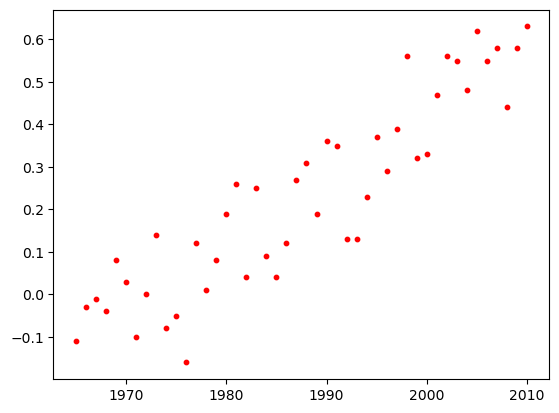

In [16]:
# Graficamos los datos observados
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(datos_x, datos_y, s=10, color='red')

In [31]:
# Construimos la matriz G
G = np.ones((len(datos_y), 2), dtype=float)
# Llenamos bien la matriz G (columna 2) con valores
# del eje x
for i in range(len(datos_x)):
    G[i][1] = datos_x[i]

In [32]:
# Primero calculamos G^T
GT = G.T
# Luego realizamos la multiplicacion G^T G
GTG = np.matmul(GT, G)
# Y su inversa
GTGI = np.linalg.inv(GTG)

# Por otro lado tenemos G^T B
GTb = np.matmul(GT, datos_y)

# Calculamos los parámetros del modelo
# realizando (GTG)^-1 (GTG) m = (GTG)^-1 GT b
mest = np.matmul( np.matmul(GTGI, GT),  datos_y)

In [33]:
# Calculemos valores estimados con los parámetros del
# modelo encontrado
datos_y_sinteticos = np.matmul(G, mest)

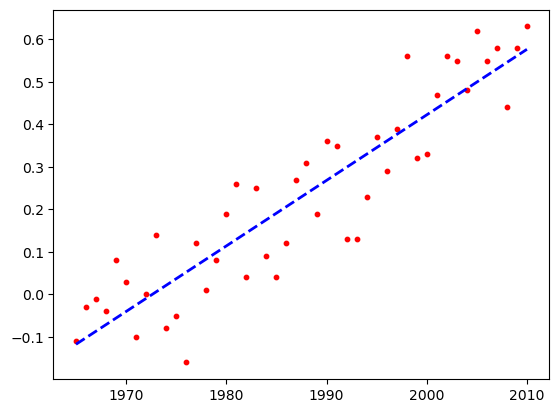

In [34]:
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(1,1,1)
ax1.scatter(datos_x, datos_y, s=10, color='red')
ax1.plot(datos_x, datos_y_sinteticos, lw=2, color='blue', ls='dashed')
plt.show()

## Ejecicio de clase

Ajuste un modelo cuadrático a los datos provistos
en el archivo "datos_ejemplo2.txt". En este archivo
se dan las coordenadas X (primera columna) y datos
y (segunda columna) de un fenómeno físico.

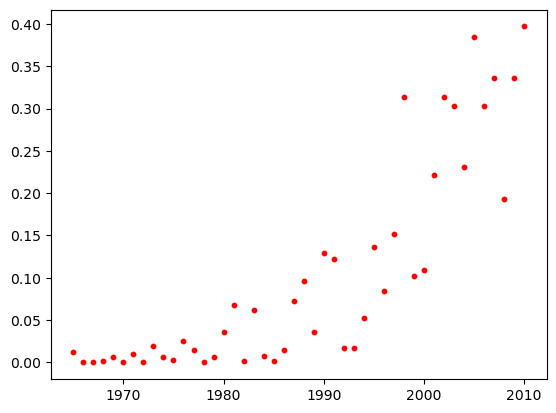

In [39]:
# Carguemos los datos
file_name = 'datos_ejemplo2.txt'
datos_x,  datos_y = np.loadtxt(file_name, dtype=float, delimiter=' ', usecols=(0, 1), unpack=True)
# Graficamos los datos observados
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(datos_x, datos_y, s=10, color='red')

In [40]:
# Construimos la matriz G
G = np.ones((len(datos_y), 3), dtype=float)
# Llenamos bien la matriz G (columna 2) con valores
# del eje x
for i in range(len(datos_x)):
    G[i][1] = datos_x[i]
    G[i][2] = datos_x[i]**2.

In [41]:
# Primero calculamos G^T
GT = G.T
# Luego realizamos la multiplicacion G^T G
GTG = np.matmul(GT, G)
# Y su inversa
GTGI = np.linalg.inv(GTG)

# Por otro lado tenemos G^T B
GTb = np.matmul(GT, datos_y)

# Calculamos los parámetros del modelo
# realizando (GTG)^-1 (GTG) m = (GTG)^-1 GT b
mest = np.matmul( np.matmul(GTGI, GT),  datos_y)

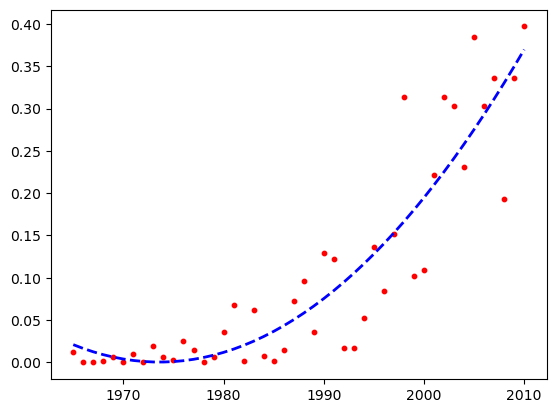

In [42]:
# Calculemos valores estimados con los parámetros del
# modelo encontrado
datos_y_sinteticos = np.matmul(G, mest)

fig2 = plt.figure(2)
ax1 = fig2.add_subplot(1,1,1)
ax1.scatter(datos_x, datos_y, s=10, color='red')
ax1.plot(datos_x, datos_y_sinteticos, lw=2, color='blue', ls='dashed')
plt.show()